(0, 2) 0.5 [1]
(0, 48) 0.736089022119272 [0.82888943503993]
(0, 48) 0.9518862763432118 [0.5381203151392989]
(0, 48) 0.997656347928797 [0.44991513571174296]
(0, 48) 0.9999992610853855 [0.3981647509404506]
(0, 48) 0.999999999912911 [0.3742788970611329]
(0, 48) 0.9999999999999398 [0.3707269729023567]
(0, 48) 1.0 [0.3655203542147501]


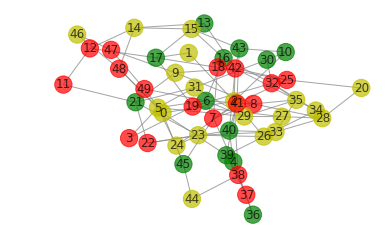

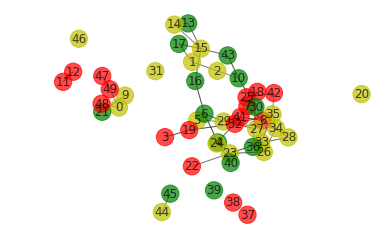

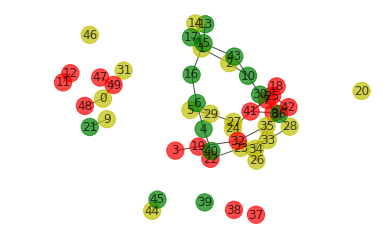

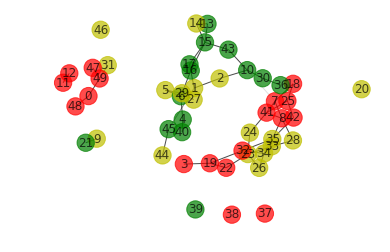

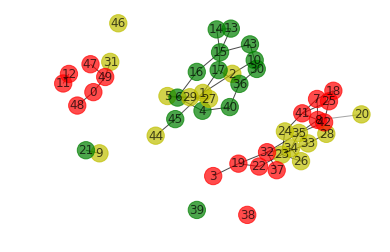

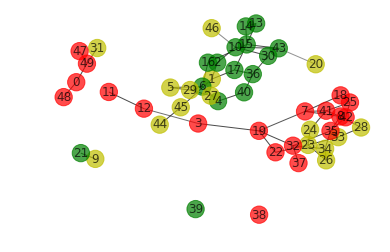

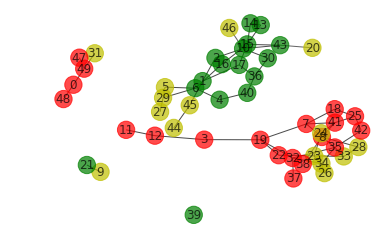

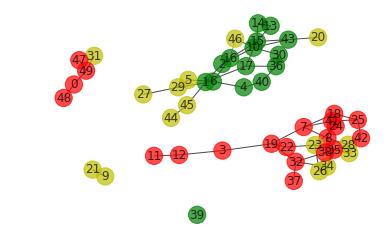

In [301]:
from matplotlib import pyplot as plt
import networkx as nx
import random
%matplotlib inline
import numpy as np

class SocialDynamicsSimulation:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 0.5
        for node in self.graph.nodes:
            #from an array of three topics visualize topic one
            three_topics = np.random.choice(2, 2, p=[0.5, 0.5])
            self.graph.nodes[node]['opinion'] = three_topics[0]
            self.graph.nodes[node]['opinion2'] = three_topics[1]
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0

    def observe(self):

        '''
        Draw the state of the network.
        '''

        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()         
        red = 0
        green = 0
        yellow = 0
        node_color = []
        for node in self.graph.nodes:
            
            #conservative - red
            if self.graph.nodes[node]['opinion'] < .5 and self.graph.nodes[node]['opinion2'] < 0.5:
                node_color.append('r')
                red += 1
                
            #liberal - green
            elif self.graph.nodes[node]['opinion'] >= .5 and self.graph.nodes[node]['opinion2']>= .5:
                node_color.append('g')
                green += 1
                
            #mix - yellow
            elif self.graph.nodes[node]['opinion']>= .5 and self.graph.nodes[node]['opinion2']< 0.5:
                node_color.append('y')
                yellow += 1
            
            elif self.graph.nodes[node]['opinion']< 0.5 and self.graph.nodes[node]['opinion2']>= .5:
                node_color.append('y')
                yellow += 1
                      
        nx.draw_networkx(self.graph, pos=self.layout, with_labels=True,
                        node_color = node_color,
                        edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
                        edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
                        alpha=0.7, vmin=0, vmax=1) 
        
        plt.axis('off')
        
        #Tracking how opinion and weight changes --> data for the vector field
        #edge1 = list(self.graph.edges)[0]
        #weight1 = self.graph.edges[edge1]['weight']
        #opinions__ = [self.graph.nodes[0]['opinion']]
        #print edge1, weight1, opinions__ 
        
        #Tracking how opinion and weight changes --> data for the vector field
        edge2 = list(self.graph.edges)[0]
        weight2 = self.graph.edges[edge2]['weight']
        opinions__2 = [self.graph.nodes[0]['opinion2']]
        print edge2, weight2, opinions__2         
                
    def update(self):

        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            # Select a random edge and update node opinions and edge weight
            
            edge = random.choice(list(self.graph.edges))
            weight = self.graph.edges[edge]['weight']
            opinions = [self.graph.nodes[n]['opinion'] for n in edge]
            opinions2 = [self.graph.nodes[n]['opinion2'] for n in edge]
        
            
            #if both nodes have same 0 score for opinion 1 and opinion 2   
            if self.graph.nodes[edge[0]]['opinion'] <.5 and self.graph.nodes[edge[1]]['opinion'] <.5 and self.graph.nodes[edge[0]]['opinion2'] <.5 and self.graph.nodes[edge[1]]['opinion2'] <.5:
                self.graph.nodes[edge[0]]['opinion'] = (
                    opinions[0] + self.alpha * weight * (opinions[1-0] - opinions[0]))
                self.graph.nodes[edge[1]]['opinion'] = (
                    opinions[1] + self.alpha * weight * (opinions[1-1] - opinions[1]))
                self.graph.nodes[edge[0]]['opinion2'] = (
                    opinions2[0] + self.alpha * weight * (opinions2[1-0] - opinions2[0]))
                self.graph.nodes[edge[1]]['opinion2'] = (
                    opinions2[1] + self.alpha * weight * (opinions2[1-1] - opinions2[1]))
                self.graph.edges[edge]['weight'] = (
                weight + self.beta * 2*weight * (1-weight) * (1 - 0.5*self.gamma * abs(opinions[0] - opinions[1])))
                
            
            #if both nodes have same 1 score for opinion 1 and opinion 2   
            elif self.graph.nodes[edge[0]]['opinion'] >=.5 and self.graph.nodes[edge[1]]['opinion'] >=.5 and self.graph.nodes[edge[0]]['opinion2']  >=.5 and self.graph.nodes[edge[1]]['opinion2']  >=.5:
                self.graph.nodes[edge[0]]['opinion'] = (
                    opinions[0] + self.alpha * weight * (opinions[1-0] - opinions[0]))
                self.graph.nodes[edge[1]]['opinion'] = (
                    opinions[1] + self.alpha * weight * (opinions[1-1] - opinions[1]))
                self.graph.nodes[edge[0]]['opinion2'] = (
                    opinions2[0] + self.alpha * weight * (opinions2[1-0] - opinions2[0]))
                self.graph.nodes[edge[1]]['opinion2'] = (
                    opinions2[1] + self.alpha * weight * (opinions2[1-1] - opinions2[1]))
                self.graph.edges[edge]['weight'] = (
                weight + self.beta * 2*weight * (1-weight) * (1 - 0.5*self.gamma * abs(opinions[0] - opinions[1])))
                
                
            #If there are contradicting opinions on either topic one or two 
            #The opinions are less likely to be changes and nodes are more picky
            elif self.graph.nodes[edge[0]]['opinion'] !=  self.graph.nodes[edge[1]]['opinion'] or self.graph.nodes[edge[0]]['opinion2'] != self.graph.nodes[edge[1]]['opinion2']:
                self.graph.nodes[edge[0]]['opinion'] = (
                    opinions[0] + self.alpha * weight * (opinions[1-0] - opinions[0]))
                self.graph.nodes[edge[1]]['opinion'] = (
                    opinions[1] + self.alpha * weight * (opinions[1-1] - opinions[1]))
                self.graph.nodes[edge[0]]['opinion2'] = (
                    opinions2[0] + self.alpha * weight * (opinions2[1-0] - opinions2[0]))
                self.graph.nodes[edge[1]]['opinion2'] = (
                    opinions2[1] + self.alpha * weight * (opinions2[1-1] - opinions2[1]))
                self.graph.edges[edge]['weight'] = (
                weight + 0.7*self.beta * weight * (1-weight) * (1 - 2*self.gamma * abs(opinions[0] - opinions[1])))                
                
            else:
                self.graph.edges[edge]['weight'] = (
                    weight +
                    self.beta * weight * (1-weight) *
                    (1 - self.gamma * abs(opinions[0] - opinions[1])))
                  
            
            # Remove very weak connections
            if self.graph.edges[edge]['weight'] < 0.05:
                self.graph.remove_edge(*edge)
        
        self.step += 1
        
        
        
sim = SocialDynamicsSimulation()
sim.initialize()
plt.figure()
sim.observe()
for i in range(7): #repeat 7 times 
    
    for i in range(500):  #Each repetition increase by 500 steps
        sim.update()
    plt.figure()
    sim.observe()
    


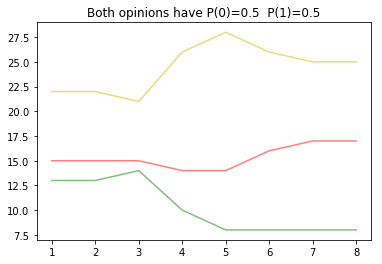

In [302]:
import numpy as np
import matplotlib.pyplot as plt

'''
15 22 13
15 22 13
15 21 14
14 26 10
14 28 8
16 26 8
17 25 8
17 25 8
'''

g =[13,13,14,10,8,8,8,8] #how many color it is 
r = [15,15,15,14,14,16,17,17]
y = [22,22,21,26,28,26,25,25]
x=[1,2,3,4,5,6,7,8]  #how many itterations is this 

plt.plot(x, y, c='y', alpha=0.5)
plt.plot(x, r, c='r', alpha=0.5)
plt.plot(x, g, c='g', alpha=0.5)
plt.title("Both opinions have P(0)=0.5  P(1)=0.5")
plt.show()

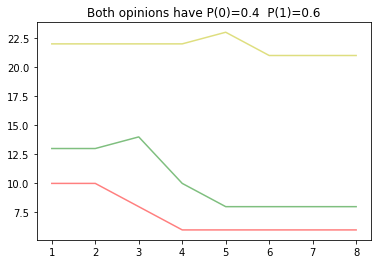

In [303]:

'''
10 22 18
10 22 18
8 22 20
6 22 22
6 23 21
6 21 23
6 21 23
6 21 23

'''
r = [10,10,8,6,6,6,6,6]
y = [22,22,22,22,23,21,21,21]
g =[13,13,14,10,8,8,8,8] #how many color it is 


x=[1,2,3,4,5,6,7,8]  #how many itterations is this 

plt.plot(x, y, c='y', alpha=0.5)
plt.plot(x, r, c='r', alpha=0.5)
plt.plot(x, g, c='g', alpha=0.5)
plt.title("Both opinions have P(0)=0.4  P(1)=0.6")
plt.show()

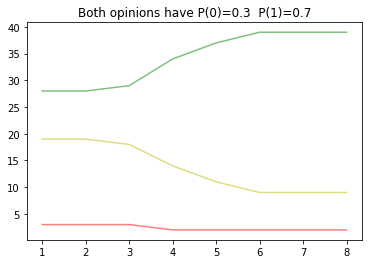

In [304]:
'''
3 19 28
3 19 28
3 18 29
2 14 34
2 11 37
2 9 39
2 9 39
2 9 39

'''

r = [3,3,3,2,2,2,2,2]
y = [19,19,18,14,11,9,9,9]
g =[28,28,29,34,37,39,39,39] #how many color it is 


x=[1,2,3,4,5,6,7,8]  #how many itterations is this 

plt.plot(x, y, c='y', alpha=0.5)
plt.plot(x, r, c='r', alpha=0.5)
plt.plot(x, g, c='g', alpha=0.5)
plt.title("Both opinions have P(0)=0.3  P(1)=0.7")
plt.show()

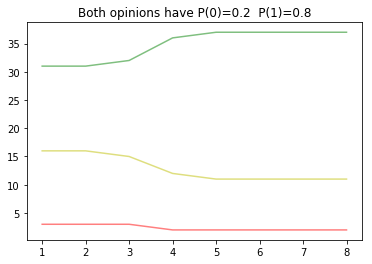

In [305]:
'''
3 16 31
3 16 31
3 15 32
2 12 36
2 11 37
2 11 37
2 11 37
2 11 37
'''

r = [3,3,3,2,2,2,2,2]
y = [16,16,15,12,11,11,11,11]
g =[31,31,32,36,37,37,37,37] #how many color it is 


x=[1,2,3,4,5,6,7,8]  #how many itterations is this 

plt.plot(x, y, c='y', alpha=0.5)
plt.plot(x, r, c='r', alpha=0.5)
plt.plot(x, g, c='g', alpha=0.5)
plt.title("Both opinions have P(0)=0.2  P(1)=0.8")
plt.show()

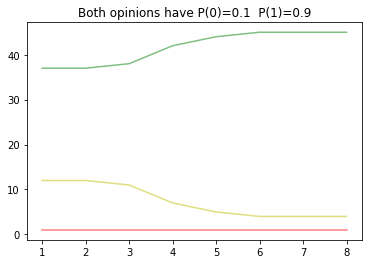

In [309]:
'''
1 12 37
1 12 37
1 11 38
1 7 42
1 5 44
1 4 45
1 4 45
1 4 45
'''

r = [1,1,1,1,1,1,1,1]
y = [12,12,11,7,5,4,4,4]
g =[37,37,38,42,44,45,45,45] #how many color it is 


x=[1,2,3,4,5,6,7,8]  #how many itterations is this 

plt.plot(x, y, c='y', alpha=0.5)
plt.plot(x, r, c='r', alpha=0.5)
plt.plot(x, g, c='g', alpha=0.5)
plt.title("Both opinions have P(0)=0.1  P(1)=0.9")
plt.show()

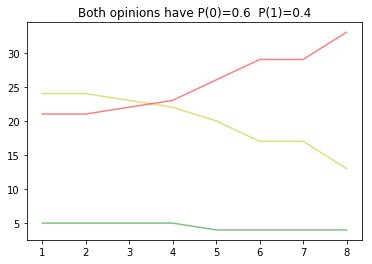

In [310]:
'''
21 24 5
21 24 5
22 23 5
23 22 5
26 20 4
29 17 4
29 17 4
33 13 4

'''

r = [21,21,22,23,26,29,29,33]
y = [24,24,23,22,20,17,17,13]
g =[5,5,5,5,4,4,4,4] #how many color it is 


x=[1,2,3,4,5,6,7,8]  #how many itterations is this 

plt.plot(x, y, c='y', alpha=0.5)
plt.plot(x, r, c='r', alpha=0.5)
plt.plot(x, g, c='g', alpha=0.5)
plt.title("Both opinions have P(0)=0.6  P(1)=0.4")
plt.show()

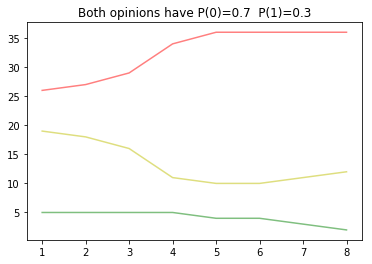

In [311]:
'''
26 19 5
27 18 5
29 16 5
34 11 5
36 10 4
36 10 4
36 11 3
36 12 2
'''


r = [26,27,29,34,36,36,36,36]
y = [19,18,16,11,10,10,11,12]
g =[5,5,5,5,4,4,3,2] #how many color it is 


x=[1,2,3,4,5,6,7,8]  #how many itterations is this 

plt.plot(x, y, c='y', alpha=0.5)
plt.plot(x, r, c='r', alpha=0.5)
plt.plot(x, g, c='g', alpha=0.5)
plt.title("Both opinions have P(0)=0.7  P(1)=0.3")
plt.show()


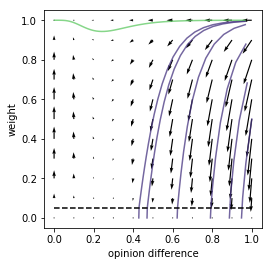

In [46]:
#Opinion 1

from matplotlib import pyplot
import itertools
import scipy

alpha = 0.03
beta = 0.3
gamma = 4

cmap = pyplot.cm.viridis  # color map to use

# Plot traces of how opinion and weight change over time --> opinion 1, weights and opinion for node 0 and its links
#opinion difference and weight
#for a specific node trace opinion 1 
for opinion, weight in [
    [1, 0.5], [0.9769913565756865, 0.6824695759618555], [0.9702308288843239, 0.8790681709999999], [0.9671418073744935, 0.9777964827784186], [0.9653905482058007, 0.9944168309136345],
    [0.965288662143014, 0.9959867775776804], [0.9657055714064408, 0.9998934436483043]
]:
    
'''
(0, 2) 0.5 [1]
(0, 2) 0.6824695759618555 [0.9769913565756865]
(0, 2) 0.8790681709999999 [0.9702308288843239]
(0, 2) 0.9777964827784186 [0.9671418073744935]
(0, 2) 0.9944168309136345 [0.9659809200231512]
(0, 2) 0.9989039369542039 [0.9653905482058007]
(0, 16) 0.9959867775776804 [0.965288662143014]
(0, 16) 0.9998934436483043 [0.9657055714064408]
'''  

    ow = [[opinion, 0.0, weight]]
    for i in range(100):
        delta_o = alpha * ow[-1][2] * (ow[-1][1] - ow[-1][0])
        delta_w = (
            beta * ow[-1][2] * (1-ow[-1][2]) *
            (1-gamma*abs(ow[-1][1] - ow[-1][0])))
        new_weight = ow[-1][2] + delta_w
        if new_weight < 0.05:
            new_weight = 0
        ow.append([ow[-1][0] + delta_o, ow[-1][1] - delta_o, new_weight])
    pyplot.plot(
        [row[0] - row[1] for row in ow],
        [row[2] for row in ow],
        color=(cmap(0.15) if ow[-1][2] == 0 else cmap(0.75)),
        alpha=0.75)

# Plot vector field
opinion = scipy.linspace(0, 1, 11)  # the difference in opinion, |o_i - o_j|
weight = scipy.linspace(0, 1, 11)   # the edge weight, w_ij
ow_grid = scipy.meshgrid(opinion, weight)
delta_o_grid = -2*alpha * ow_grid[1] * ow_grid[0]
delta_w_grid = beta * ow_grid[1] * (1-ow_grid[1]) * (1 - gamma * ow_grid[0])
pyplot.quiver(ow_grid[0], ow_grid[1], delta_o_grid, delta_w_grid)

# Annotate plot
pyplot.xlabel('opinion difference')
pyplot.ylabel('weight')
pyplot.plot([0, 1], [0.05, 0.05], 'k--')
pyplot.axis('square')
pyplot.show()



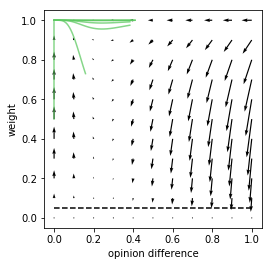

In [52]:
#Opinion 2

'''
(0, 17) 0.5 [0]
(0, 24) 0.7299502098579563 [0.15887355152343827]
(0, 24) 0.9747292046013999 [0.3832074339267556]
(0, 24) 0.9920134765712592 [0.3832622728882556]
(0, 24) 0.9991782226949378 [0.4022038427083378]
(0, 24) 0.9998626312146845 [0.41032357111511825] 
(0, 24) 0.9999773167878986 [0.4093466216059969]
'''

from matplotlib import pyplot
import itertools
import scipy

alpha = 0.03
beta = 0.3
gamma = 4

cmap = pyplot.cm.viridis  # color map to use

# Plot traces of how opinion and weight change over time --> opinion 1, weights and opinion for node 0 and its links
#opinion difference and weight
#for a specific node trace opinion 1 
for opinion, weight in [
    [0, 0.5], [0.15887355152343827, 0.7299502098579563], [0.3832074339267556, 0.9747292046013999], [0.3832622728882556, 0.9920134765712592], [0.4022038427083378, 0.9991782226949378],
    [0.41032357111511825, 0.9998626312146845], [0.4093466216059969, 0.9999773167878986]
]:
    


    ow = [[opinion, 0.0, weight]]
    for i in range(100):
        delta_o = alpha * ow[-1][2] * (ow[-1][1] - ow[-1][0])
        delta_w = (
            beta * ow[-1][2] * (1-ow[-1][2]) *
            (1-gamma*abs(ow[-1][1] - ow[-1][0])))
        new_weight = ow[-1][2] + delta_w
        if new_weight < 0.05:
            new_weight = 0
        ow.append([ow[-1][0] + delta_o, ow[-1][1] - delta_o, new_weight])
    pyplot.plot(
        [row[0] - row[1] for row in ow],
        [row[2] for row in ow],
        color=(cmap(0.15) if ow[-1][2] == 0 else cmap(0.75)),
        alpha=0.75)

# Plot vector field
opinion = scipy.linspace(0, 1, 11)  # the difference in opinion, |o_i - o_j|
weight = scipy.linspace(0, 1, 11)   # the edge weight, w_ij
ow_grid = scipy.meshgrid(opinion, weight)
delta_o_grid = -2*alpha * ow_grid[1] * ow_grid[0]
delta_w_grid = beta * ow_grid[1] * (1-ow_grid[1]) * (1 - gamma * ow_grid[0])
pyplot.quiver(ow_grid[0], ow_grid[1], delta_o_grid, delta_w_grid)

# Annotate plot
pyplot.xlabel('opinion difference')
pyplot.ylabel('weight')
pyplot.plot([0, 1], [0.05, 0.05], 'k--')
pyplot.axis('square')
pyplot.show()



Two nodes interaction

0.5525
0.6044211875
0.6546313927762288
0.7021101105735263
0.7460319262463573


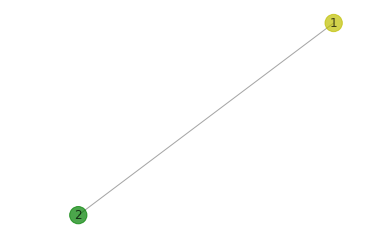

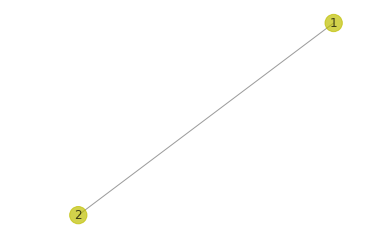

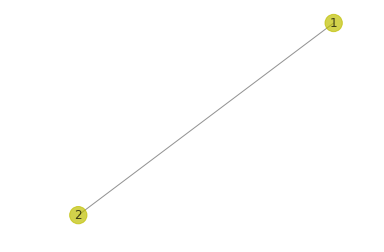

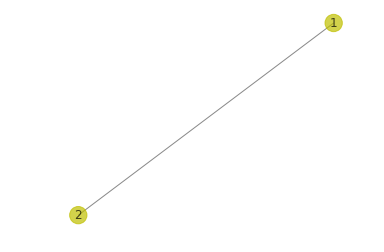

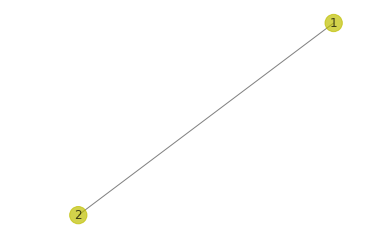

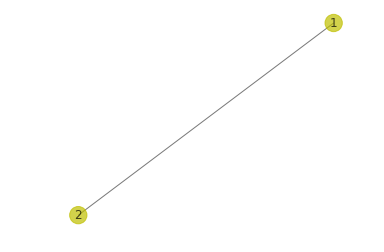

In [189]:
class SocialDynamicsSimulation:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=2, alpha=0.03, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        
        #Creating a two node graph
        G=nx.Graph()
        G.add_node(1)
        G.add_node(2)
        G.add_edges_from([(1,2)])
        
        self.graph = G 

        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 0.5
        for node in self.graph.nodes:
            #from an array of three topics visualize topic one
            three_topics = np.random.choice(2, 2, p=[0.4, 0.6])
            self.graph.nodes[node]['opinion'] = three_topics[0]
            self.graph.nodes[node]['opinion2'] = three_topics[1]
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()         
        
        node_color = []
        for node in self.graph.nodes:
            #conservative - red
            if self.graph.nodes[node]['opinion']== 0 and self.graph.nodes[node]['opinion2']== 0:
                node_color.append('r')
            #liberal - green
            elif self.graph.nodes[node]['opinion']== 1 and self.graph.nodes[node]['opinion2']== 1:
                node_color.append('g')
            #mix - yellow
            elif self.graph.nodes[node]['opinion']== 1 and self.graph.nodes[node]['opinion2']== 0:
                node_color.append('y')
            
            elif self.graph.nodes[node]['opinion']== 0 and self.graph.nodes[node]['opinion2']== 1:
                node_color.append('y')
            else:
                node_color.append('y')
                
        nx.draw_networkx(self.graph, pos=self.layout, with_labels=True,
                        node_color = node_color,
                        edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
                        edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
                        alpha=0.7, vmin=0, vmax=1)            
        plt.axis('off')
                
    def update(self):
        

        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            # Select a random edge and update node opinions and edge weight
            edge = random.choice(list(self.graph.edges))
            weight = self.graph.edges[edge]['weight']
            opinions = [self.graph.nodes[n]['opinion'] for n in edge]
            opinions2 = [self.graph.nodes[n]['opinion2'] for n in edge]
            for i in [0, 1]:
                self.graph.nodes[edge[i]]['opinion'] = (
                    opinions[i] + self.alpha * weight * (opinions[1-i] - opinions[i]))
                self.graph.nodes[edge[i]]['opinion2'] = (
                    opinions2[i] + self.alpha * weight * (opinions2[1-i] - opinions2[i]))
            
            #if both nodes have same 0 score for opinion 1 and opinion 2   
            if self.graph.nodes[edge[0]]['opinion'] <.5 and self.graph.nodes[edge[1]]['opinion'] <.5 and self.graph.nodes[edge[0]]['opinion2'] <.5 and self.graph.nodes[edge[1]]['opinion2'] <.5:
                self.graph.nodes[edge[0]]['opinion'] = (
                    opinions[0] + self.alpha * weight * (opinions[1-0] - opinions[0]))
                self.graph.nodes[edge[1]]['opinion'] = (
                    opinions[1] + self.alpha * weight * (opinions[1-1] - opinions[1]))
                self.graph.nodes[edge[0]]['opinion2'] = (
                    opinions2[0] + self.alpha * weight * (opinions2[1-0] - opinions2[0]))
                self.graph.nodes[edge[1]]['opinion2'] = (
                    opinions2[1] + self.alpha * weight * (opinions2[1-1] - opinions2[1]))
                self.graph.edges[edge]['weight'] = (
                weight + self.beta * 2*weight * (1-weight) * (1 - 0.5*self.gamma * abs(opinions[0] - opinions[1])))
                print self.graph.edges[edge]['weight']
                
            #if both nodes have same 1 score for opinion 1 and opinion 2   
            elif self.graph.nodes[edge[0]]['opinion'] >=.5 and self.graph.nodes[edge[1]]['opinion'] >=.5 and self.graph.nodes[edge[0]]['opinion2']  >=.5 and self.graph.nodes[edge[1]]['opinion2']  >=.5:
                self.graph.nodes[edge[0]]['opinion'] = (
                    opinions[0] + self.alpha * weight * (opinions[1-0] - opinions[0]))
                self.graph.nodes[edge[1]]['opinion'] = (
                    opinions[1] + self.alpha * weight * (opinions[1-1] - opinions[1]))
                self.graph.nodes[edge[0]]['opinion2'] = (
                    opinions2[0] + self.alpha * weight * (opinions2[1-0] - opinions2[0]))
                self.graph.nodes[edge[1]]['opinion2'] = (
                    opinions2[1] + self.alpha * weight * (opinions2[1-1] - opinions2[1]))
                self.graph.edges[edge]['weight'] = (
                weight + self.beta * 2*weight * (1-weight) * (1 - 0.5*self.gamma * abs(opinions[0] - opinions[1])))
                print self.graph.edges[edge]['weight']

            #If there are contradicting opinions on either topic one or two 
            #The opinions are less likely to be changes and nodes are more picky
            elif self.graph.nodes[edge[0]]['opinion'] !=  self.graph.nodes[edge[1]]['opinion'] or self.graph.nodes[edge[0]]['opinion2'] != self.graph.nodes[edge[1]]['opinion2']:
                self.graph.nodes[edge[0]]['opinion'] = (
                    opinions[0] + self.alpha * weight * (opinions[1-0] - opinions[0]))
                self.graph.nodes[edge[1]]['opinion'] = (
                    opinions[1] + self.alpha * weight * (opinions[1-1] - opinions[1]))
                self.graph.nodes[edge[0]]['opinion2'] = (
                    opinions2[0] + self.alpha * weight * (opinions2[1-0] - opinions2[0]))
                self.graph.nodes[edge[1]]['opinion2'] = (
                    opinions2[1] + self.alpha * weight * (opinions2[1-1] - opinions2[1]))
                self.graph.edges[edge]['weight'] = (
                weight + 0.7*self.beta * weight * (1-weight) * (1 - 2*self.gamma * abs(opinions[0] - opinions[1])))                
                print self.graph.edges[edge]['weight']
            else:
                self.graph.edges[edge]['weight'] = (
                    weight +
                    self.beta * weight * (1-weight) *
                    (1 - self.gamma * abs(opinions[0] - opinions[1])))
                print self.graph.edges[edge]['weight']
            # Remove very weak connections
            if self.graph.edges[edge]['weight'] < 0.05:
                self.graph.remove_edge(*edge)
                
        self.step += 1

sim = SocialDynamicsSimulation()
sim.initialize()
plt.figure()
sim.observe()
for i in range(5): #repeat two times --> reate 2 graphs
    for i in range(1):  #Each repetition increase by 20 steps
        sim.update()
    plt.figure()
    sim.observe()
    

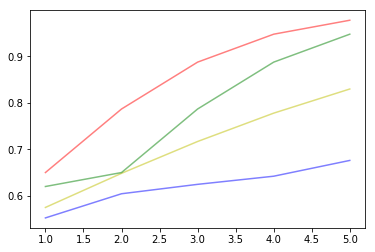

In [193]:
#statistics of weight for the probabilities 0.7 and 0.3
trial1 = [0.575, 0.6483125, 0.716713520703125, 0.7776240956864618, 0.8295015541347441]

#0.6 and 0.4
trial2 = [0.65, 0.7865, 0.88725065, 0.9472728104447465, 0.9772410302668613]

#0.5 and 0.5
trial3 = [0.5525, 0.6044211875, 0.6246313927762288, 0.6421101105735263, 0.6760319262463573]

#0.6 and 0.4
trial4 = [0.62,0.65, 0.7865, 0.88725065, 0.9472728104447465]


x=[1,2,3,4,5]  #how many itterations is this 

plt.plot(x, trial1, c='y', alpha=0.5)
plt.plot(x, trial2, c='r', alpha=0.5)
plt.plot(x, trial3, c='b', alpha=0.5)
plt.plot(x, trial4, c='g', alpha=0.5)

plt.title("")
plt.show()



In [271]:
weight = 0.5
beta = 0.3
gamma = 4.

print ("the 0.5 and 0.5 scenario")
opinion  =  np.random.choice(2, 2, p=[0.5, 0.5])

for i in range(7):
    itera = weight + 0.7*beta * weight * (1-weight) * (1 - 2*gamma * abs(opinion[0] - opinion[1]))
    weight = itera
    print itera
    
print ("")    
print ("the 0.2 and 0.8 scenario")
opinion2  =  np.random.choice(2, 2, p=[0.2, 0.8])

for i in range(7):
    itera2 = weight + beta * 2*weight * (1-weight) * (1 - 0.5*gamma * abs(opinion[0] - opinion[1]))
    weight = itera2
    print itera2
    
print ("")    
print ("the 0.7 and 0.3 scenario")
opinion2  =  np.random.choice(2, 2, p=[0.7, 0.3])

for i in range(7):
    itera3 = weight + beta * 2*weight * (1-weight) * (1 - 0.5*gamma * abs(opinion[0] - opinion[1]))
    weight = itera3
    print itera3


the 0.5 and 0.5 scenario
0.5525
0.6044211875
0.654631392776
0.702110110574
0.746031926246
0.785820267413
0.821164690107

the 0.2 and 0.8 scenario
0.909276635204
0.95877221673
0.982489048624
0.992811639399
0.997093652243
0.998832392783
0.999532139129

the 0.7 and 0.3 scenario
0.999812724315
0.999925068683
0.999970024104
0.999988009103
0.999995203555
0.999998081408
0.999999232561


In [297]:
print ("the 0.5 and 0.5 scenario",np.std([0.5525, 0.6044211875, 0.654631392776, 0.702110110574, 0.746031926246, 0.785820267413, 0.821164690107]))
print ('the 0.2 and 0.8 scenario',np.std([0.909276635204, 0.95877221673, 0.982489048624, 0.992811639399, 0.997093652243, 0.998832392783, 0.999532139129]))
print ("the 0.7 and 0.3 scenario",np.std([0.999812724315, 0.999925068683, 0.999970024104, 0.999988009103, 0.999995203555, 0.999998081408, 0.999999232561]))

('the 0.5 and 0.5 scenario', 0.09020663097165156)
('the 0.2 and 0.8 scenario', 0.03067559305493125)
('the 0.7 and 0.3 scenario', 6.311082615559804e-05)
